In [3]:
!ls

README.md                    output_13_1.png
SpotifyFeatures.csv          output_8_1.png
Untitled.ipynb               output_9_1.png
data.csv                     playlist-merged-features.csv
features.csv                 playlist_spotify_dataset.csv
labels.csv                   prep.ipynb
notebook.tex                 songdata.csv
output_11_1.png


In [4]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Sklearn imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
# Load optional data -- do not run the cell :)
# data = pd.read_csv('data.csv') # contains how many times some songs were streamed
# streams = data.sort_values(by='Streams')
# streams.head(15)

# lyrics = pd.read_csv('songdata.csv') # lyric dataset 

In [4]:
df.shape

(228159, 18)

In [6]:
df.head(15)

genre       artist_name  \
0   Opera    Giuseppe Verdi   
1   Opera   Giacomo Puccini   
2   Opera   Giacomo Puccini   
3   Opera    Giuseppe Verdi   
4   Opera    Giuseppe Verdi   
5   Opera    Giuseppe Verdi   
6   Opera     Georges Bizet   
7   Opera    Giuseppe Verdi   
8   Opera  Vincenzo Bellini   
9   Opera       Léo Delibes   
10  Opera    Richard Wagner   
11  Opera     Georges Bizet   
12  Opera    Giuseppe Verdi   
13  Opera   Giacomo Puccini   
14  Opera    Giuseppe Verdi   

                                           track_name                track_id  \
0   Stiffelio, Act III: Ei fugge! … Lina, pensai c...  7EsKYeHtTc4H4xWiTqSVZA   
1   Madama Butterfly / Act 1: ... E soffitto e pareti  7MfmRBvqaW0I6UTxXnad8p   
2       Turandot / Act 2: Gloria, gloria, o vincitore  7pBo1GDhIysyUMFXiDVoON   
3        Rigoletto, Act IV: Venti scudi hai tu detto?  02mvYZX5aKNzdqEo6jF20m   
4            Don Carlo / Act 4: "Ella giammai m'amò!"  03TW0jwGMGhUabAjOpB1T9   
5                               D'amor sull'ali rosee  0G75cCcf6vBSnMFFkVW9pq   
6                            Waxman : Carmen Fantasie  10gPtjlpTS9Uq6EUQuGljt   
7                       4 Pezzi sacri: No. 4. Te Deum  1iayQ9XmNJL2F0S0zjdNST   
8   I puritani: Ah! per sempre io ti perdei - Bel ...  297JkKwa74ayxAz38hXMeb   
9   Lakmé, Act I, No. 2: Viens, Mallika... Sous le...  3Eu8Qqq7vv0UsNWf0mWTmZ   
10  Tristan und Isolde, WWV. 90, Act III: Mild und...  3QwZLLBxuUlDgRhNqEQW9z   
11  Carmen: Act I: 'Carmen! sur tes pas nous nous ...  3W2KxQd1u8v1UOCsWn1qyV   
12    Falstaff, Act I Scene 2: "Alice. Meg. Nannetta"  3ZuEvBlO6F8iArGPdnkD8x   
13     Turandot / Act 1: Perché tarda la luna? (Coro)  46GsTkeUgN1nYhv4NPBx6F   
14            "O terra, addio; addio valle di pianti"  4Fx2s0qn4s4KEPiNTDXKRL   

    popularity  acousticness  danceability  duration_ms   energy  \
0           21         0.986        0.3130       490867  0.23100   
1           18         0.972        0.3600       176797  0.20100   
2           10         0.935        0.1680       266184  0.47000   
3           17         0.961        0.2500       288573  0.00605   
4           19         0.985        0.1420       629760  0.05800   
5           20         0.990        0.2110       334720  0.06400   
6           13         0.980        0.3410       646813  0.16000   
7           19         0.975        0.1090       963440  0.01800   
8           20         0.951        0.1690       417987  0.17800   
9           16         0.968        0.2500       373480  0.12000   
10          20         0.978        0.1800       521640  0.16700   
11          17         0.987        0.1540       103827  0.09480   
12          12         0.968        0.5180        74107  0.08340   
13          19         0.953        0.0685       247757  0.08640   
14          15         0.973        0.1600       300685  0.12100   

    instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0           0.000431  C#    0.0964   -14.287  Major       0.0547   86.001   
1           0.028000  D#    0.1330   -19.794  Major       0.0581  131.798   
2           0.020400   C    0.3630    -8.415  Major       0.0383   75.126   
3           0.000000   D    0.1200   -33.440  Major       0.0480   76.493   
4           0.146000   D    0.0969   -23.625  Major       0.0493  172.935   
5           0.019600  G#    0.0730   -20.666  Major       0.0534   81.403   
6           0.014600   D    0.1130   -19.753  Major       0.0575  171.444   
7           0.791000  F#    0.0712   -26.778  Major       0.0399   82.178   
8           0.185000   C    0.6650   -21.589  Minor       0.0540   65.995   
9           0.000049   B    0.0865   -21.205  Major       0.0654   73.433   
10          0.235000   B    0.1050   -19.212  Major       0.0430   81.348   
11          0.505000   A    0.0701   -19.569  Minor       0.0417   65.363   
12          0.000000   C    0.2440   -28.472  Major       0.0724  110.867   
13          0.877000   A    0.2470   -20.44

genre
A Capella            119
Alternative         9353
Anime               9353
Blues               9353
Children’s Music    9353
Classical           9256
Comedy              9681
Country             8664
Dance               8701
Electronic          9377
Folk                9299
Hip-Hop             9295
Indie               9543
Jazz                9441
Movie               7806
Opera               8280
Pop                 9386
R&B                 8992
Rap                 9232
Reggae              8771
Reggaeton           8927
Rock                9272
Ska                 8874
Soul                9089
Soundtrack          9646
World               9096
Name: track_id, dtype: int64


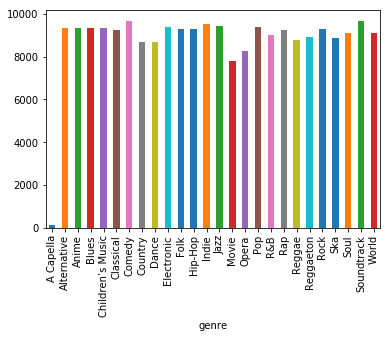

In [5]:
mask = df.groupby('genre')['track_id'].count()
# print(mask)
fig, ax = plt.subplots(1)
mask.plot(ax=ax, kind='bar')
fig.save()

genre
A Capella            119
Alternative         9353
Anime               9353
Blues               9353
Children’s Music    9353
Classical           9256
Comedy              9681
Country             8664
Dance               8701
Electronic          9377
Folk                9299
Hip-Hop             9295
Indie               9543
Jazz                9441
Movie               7806
Opera               8280
Pop                 9386
R&B                 8992
Rap                 9232
Reggae              8771
Reggaeton           8927
Rock                9272
Ska                 8874
Soul                9089
Soundtrack          9646
World               9096
Name: artist_name, dtype: int64


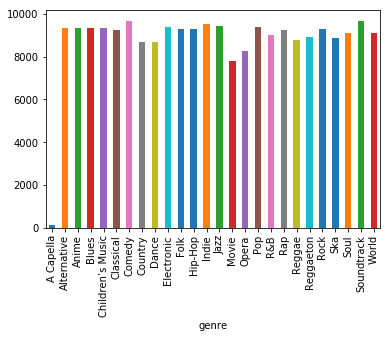

In [6]:
mask = df.groupby('genre')['artist_name'].count()
print(mask)
by_artist = df.groupby('genre')['artist_name'].count()
by_artist.plot(kind='bar')

### Sort Data by Popularity and Analyze Genre popularity 
Top 5 most popular songs in this dataset (ignore duplicates).

In [64]:
df.sort_values(by='popularity',ascending=False).head(7)

genre    artist_name                                track_name  \
12710     Pop  Ariana Grande                                   7 rings   
159005  Dance  Ariana Grande                                   7 rings   
12709     Pop    Post Malone                                      Wow.   
12708     Pop  Ariana Grande  break up with your girlfriend, i'm bored   
159004  Dance  Ariana Grande  break up with your girlfriend, i'm bored   
68784     Rap    Post Malone                                      Wow.   
12815     Pop   Daddy Yankee                                 Con Calma   

                      track_id  popularity  acousticness  danceability  \
12710   14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
159005  14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
12709   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
12708   4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
159004  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
68784   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
12815   5w9c2J52mkdntKOmRLeM2m          98        0.1100         0.737   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
12710        178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
159005       178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
12709        149520   0.539          0.000002   B    0.1010    -7.399  Minor   
12708        190440   0.554          0.000000   F    0.1060    -5.290  Minor   
159004       190440   0.554          0.000000   F    0.1060    -5.290  Minor   
68784        149520   0.539          0.000002   B    0.1010    -7.399  Minor   
12815        193227   0.860          0.000002  G#    0.0574    -2.652  Minor   

        speechiness    tempo time_signature  valence  
12710        0.3230   70.142            4/4    0.319  
159005       0.3230   70.142            4/4    0.319  
12709        0.1780   99.947            4/4    0.385  
12708        0.0917  169.999            4/4    0.335  
159004       0.0917  169.999            4/4    0.335  
68784        0.1780   99.947            4/4    0.385  
12815        0.0593   93.989            4/4    0.656

TypeError: 'AxesSubplot' object is not iterable

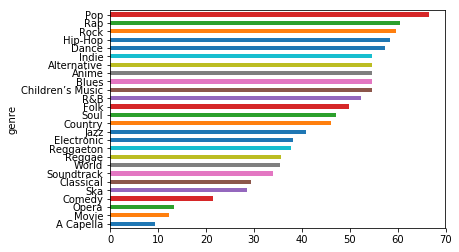

In [65]:
genre_popularity = df.groupby("genre")['popularity'].mean()
# print(genre_popularity.sort_values(ascending=False))
fig, ax = genre_popularity.sort_values().plot(kind='barh')
fig.figsize(8,8)

Most Popular genres in general are Pop, Rap, Rock, Hip-Hop and Dance. 

### Divide df into Genres
There are 26 unique genres in this dataset. Some genres 

In [6]:
acapella_df = df[df['genre']=='A Capella']            
alternative_df = df[df['genre']=='Alternative']       
anime_df = df[df['genre']=='Anime']               
blues_df = df[df['genre']=='Blues']              
children_df = df[df['genre']=='Children’s Music']   
classic_df = df[df['genre']=='Classical']          
comedy_df = df[df['genre']=='Comedy']             
country_df = df[df['genre']=='Country']             
dance_df = df[df['genre']=='Dance']               
elec_df = df[df['genre']=='Electronic']          
folk_df = df[df['genre']=='Folk']                
hiphop_df = df[df['genre']=='Hip-Hop']             
indie_df = df[df['genre']=='Indie']               
jazz_df = df[df['genre']=='Jazz']                
movie_df = df[df['genre']=='Movie']               
opera_df = df[df['genre']=='Opera']             
pop_df = df[df['genre']=='Pop']               
rnb_df = df[df['genre']=='R&B']                 
rap_df = df[df['genre']=='Rap']                 
reggae_df = df[df['genre']=='Reggae']              
reggaeton_df = df[df['genre']=='Reggaeton']           
rock_df = df[df['genre']=='Rock']                
ska_df = df[df['genre']=='Ska']                 
soul_df = df[df['genre']=='Soul']                
soundtrack_df = df[df['genre']=='Soundtrack']          
world_df = df[df['genre']=='World']               

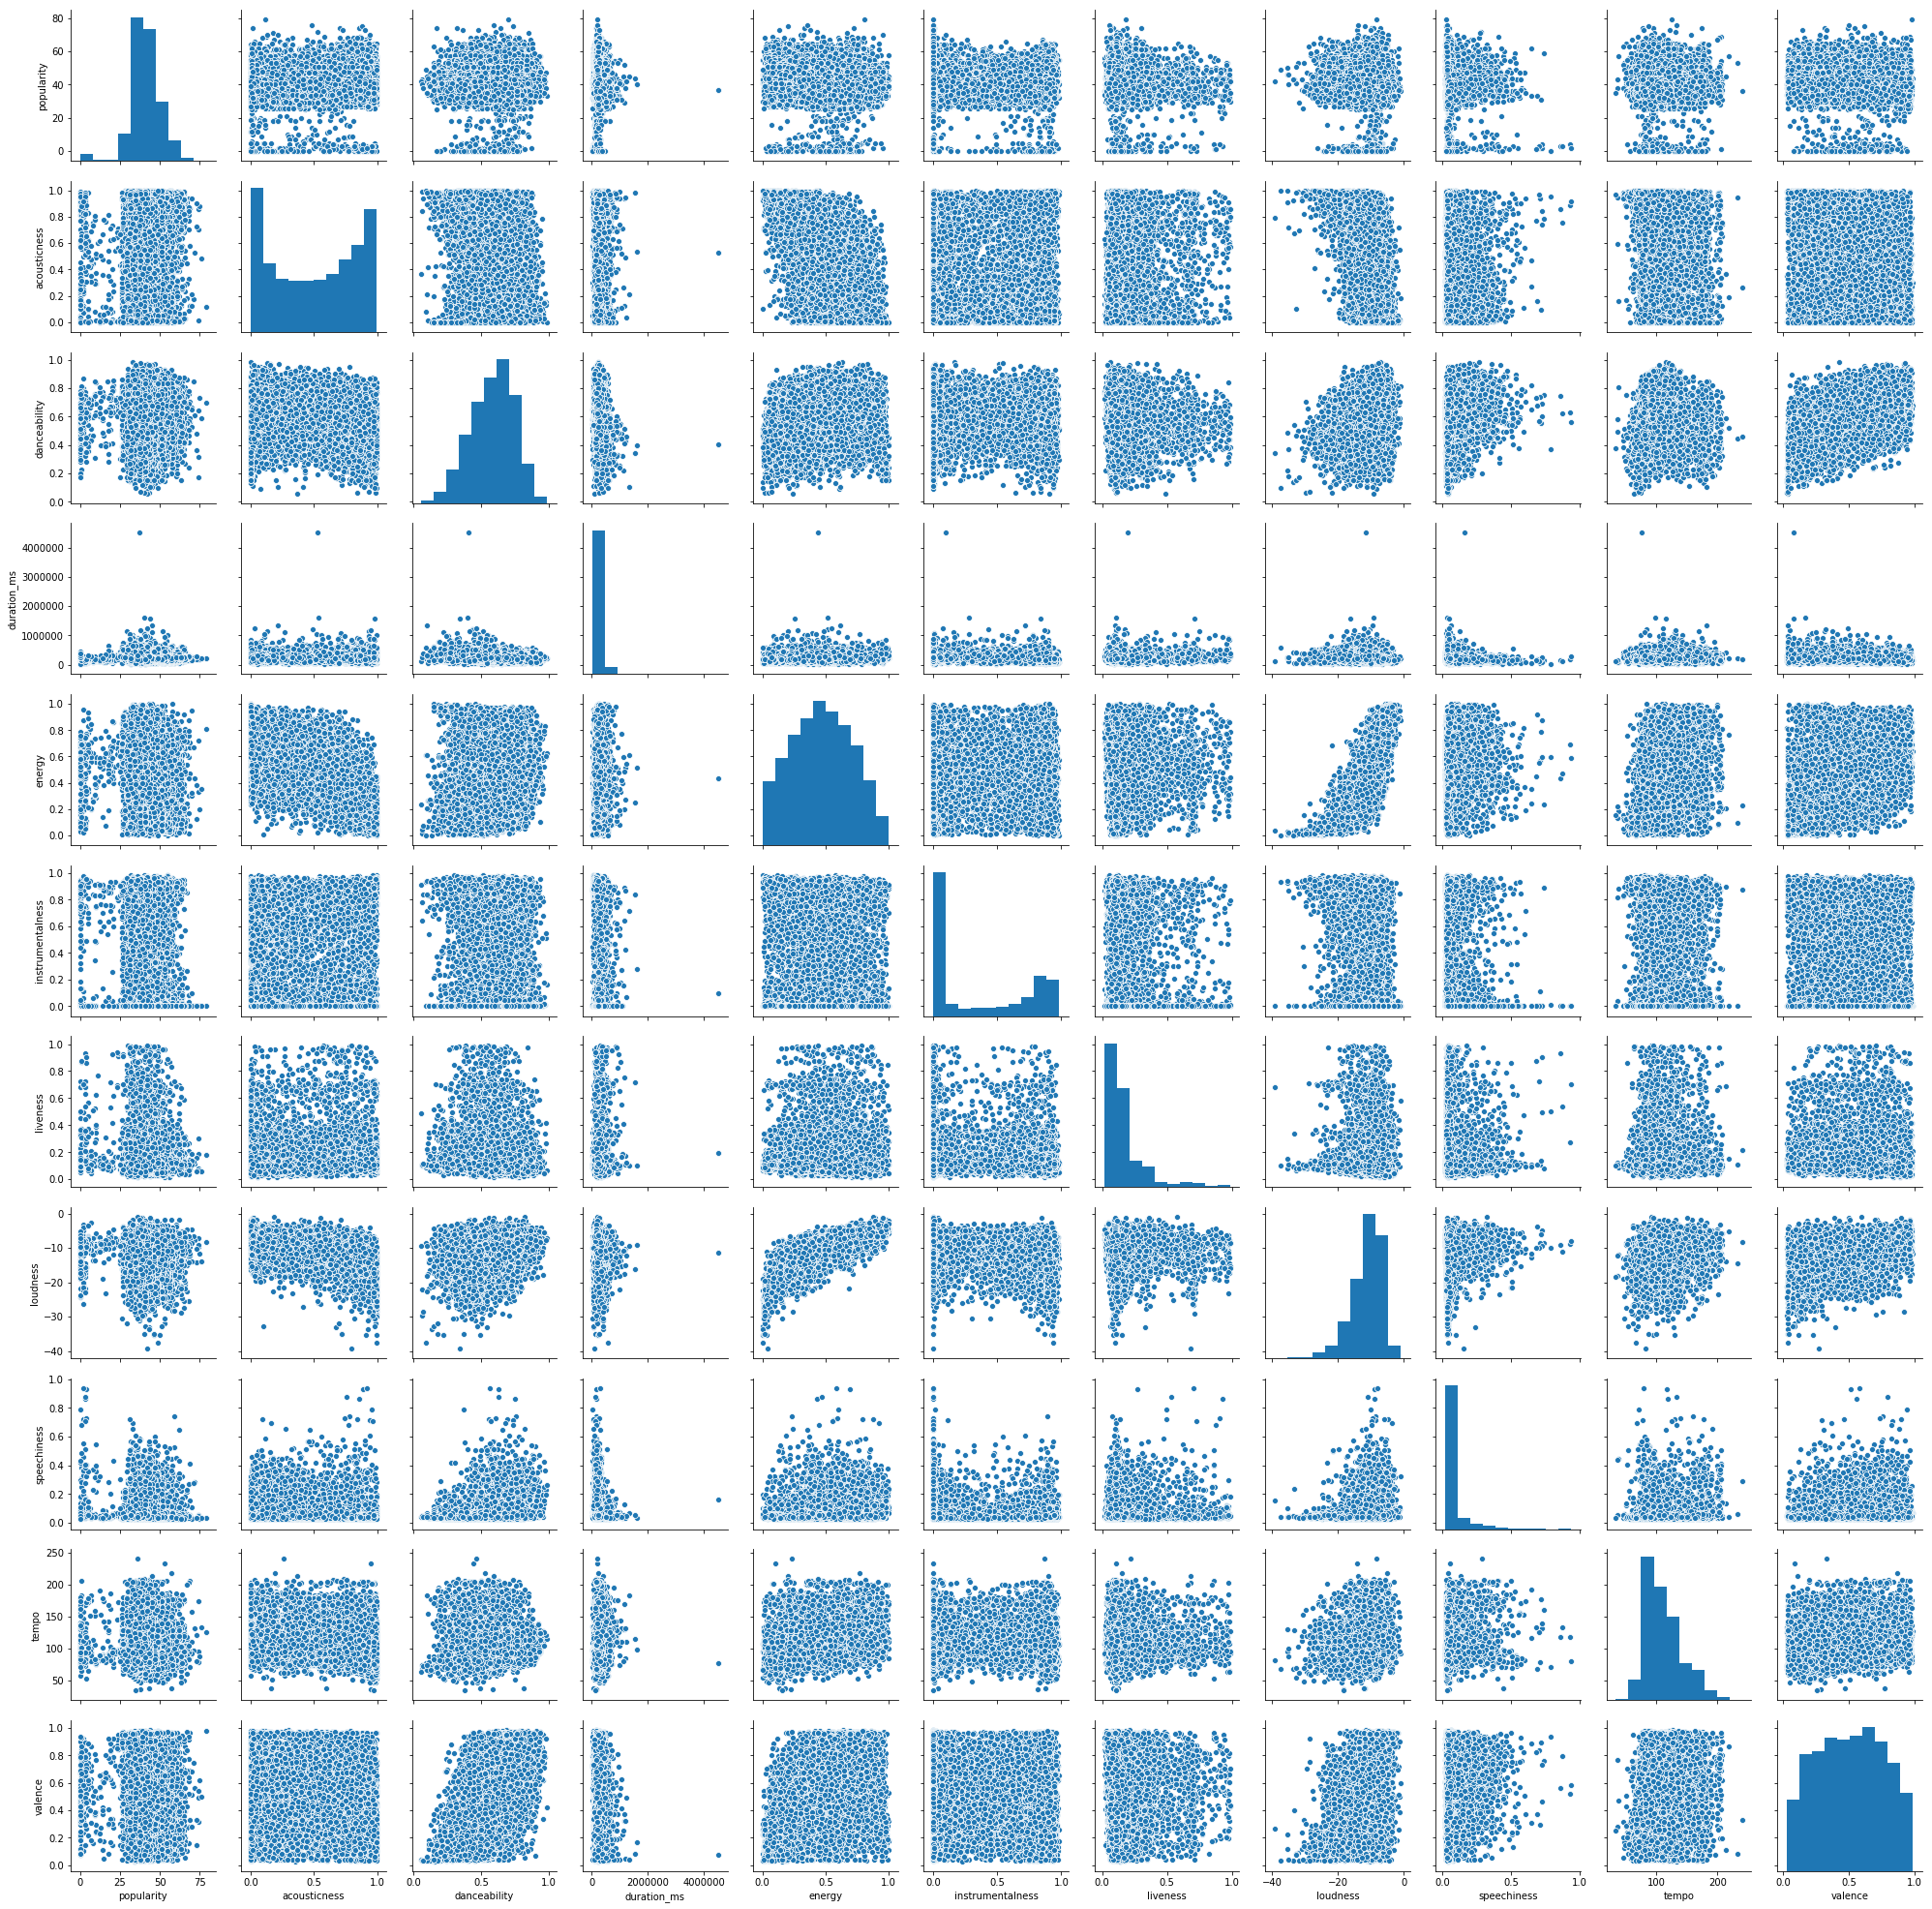

In [11]:
# sns.pairplot(jazz)

### Select 3 Features that has highest correlation with the popularity. 
- Values with |corr| > 0.25 : Acousticness, Danceability, energy, loudness
- These features will be used in Support Vector Regressor (SVR)

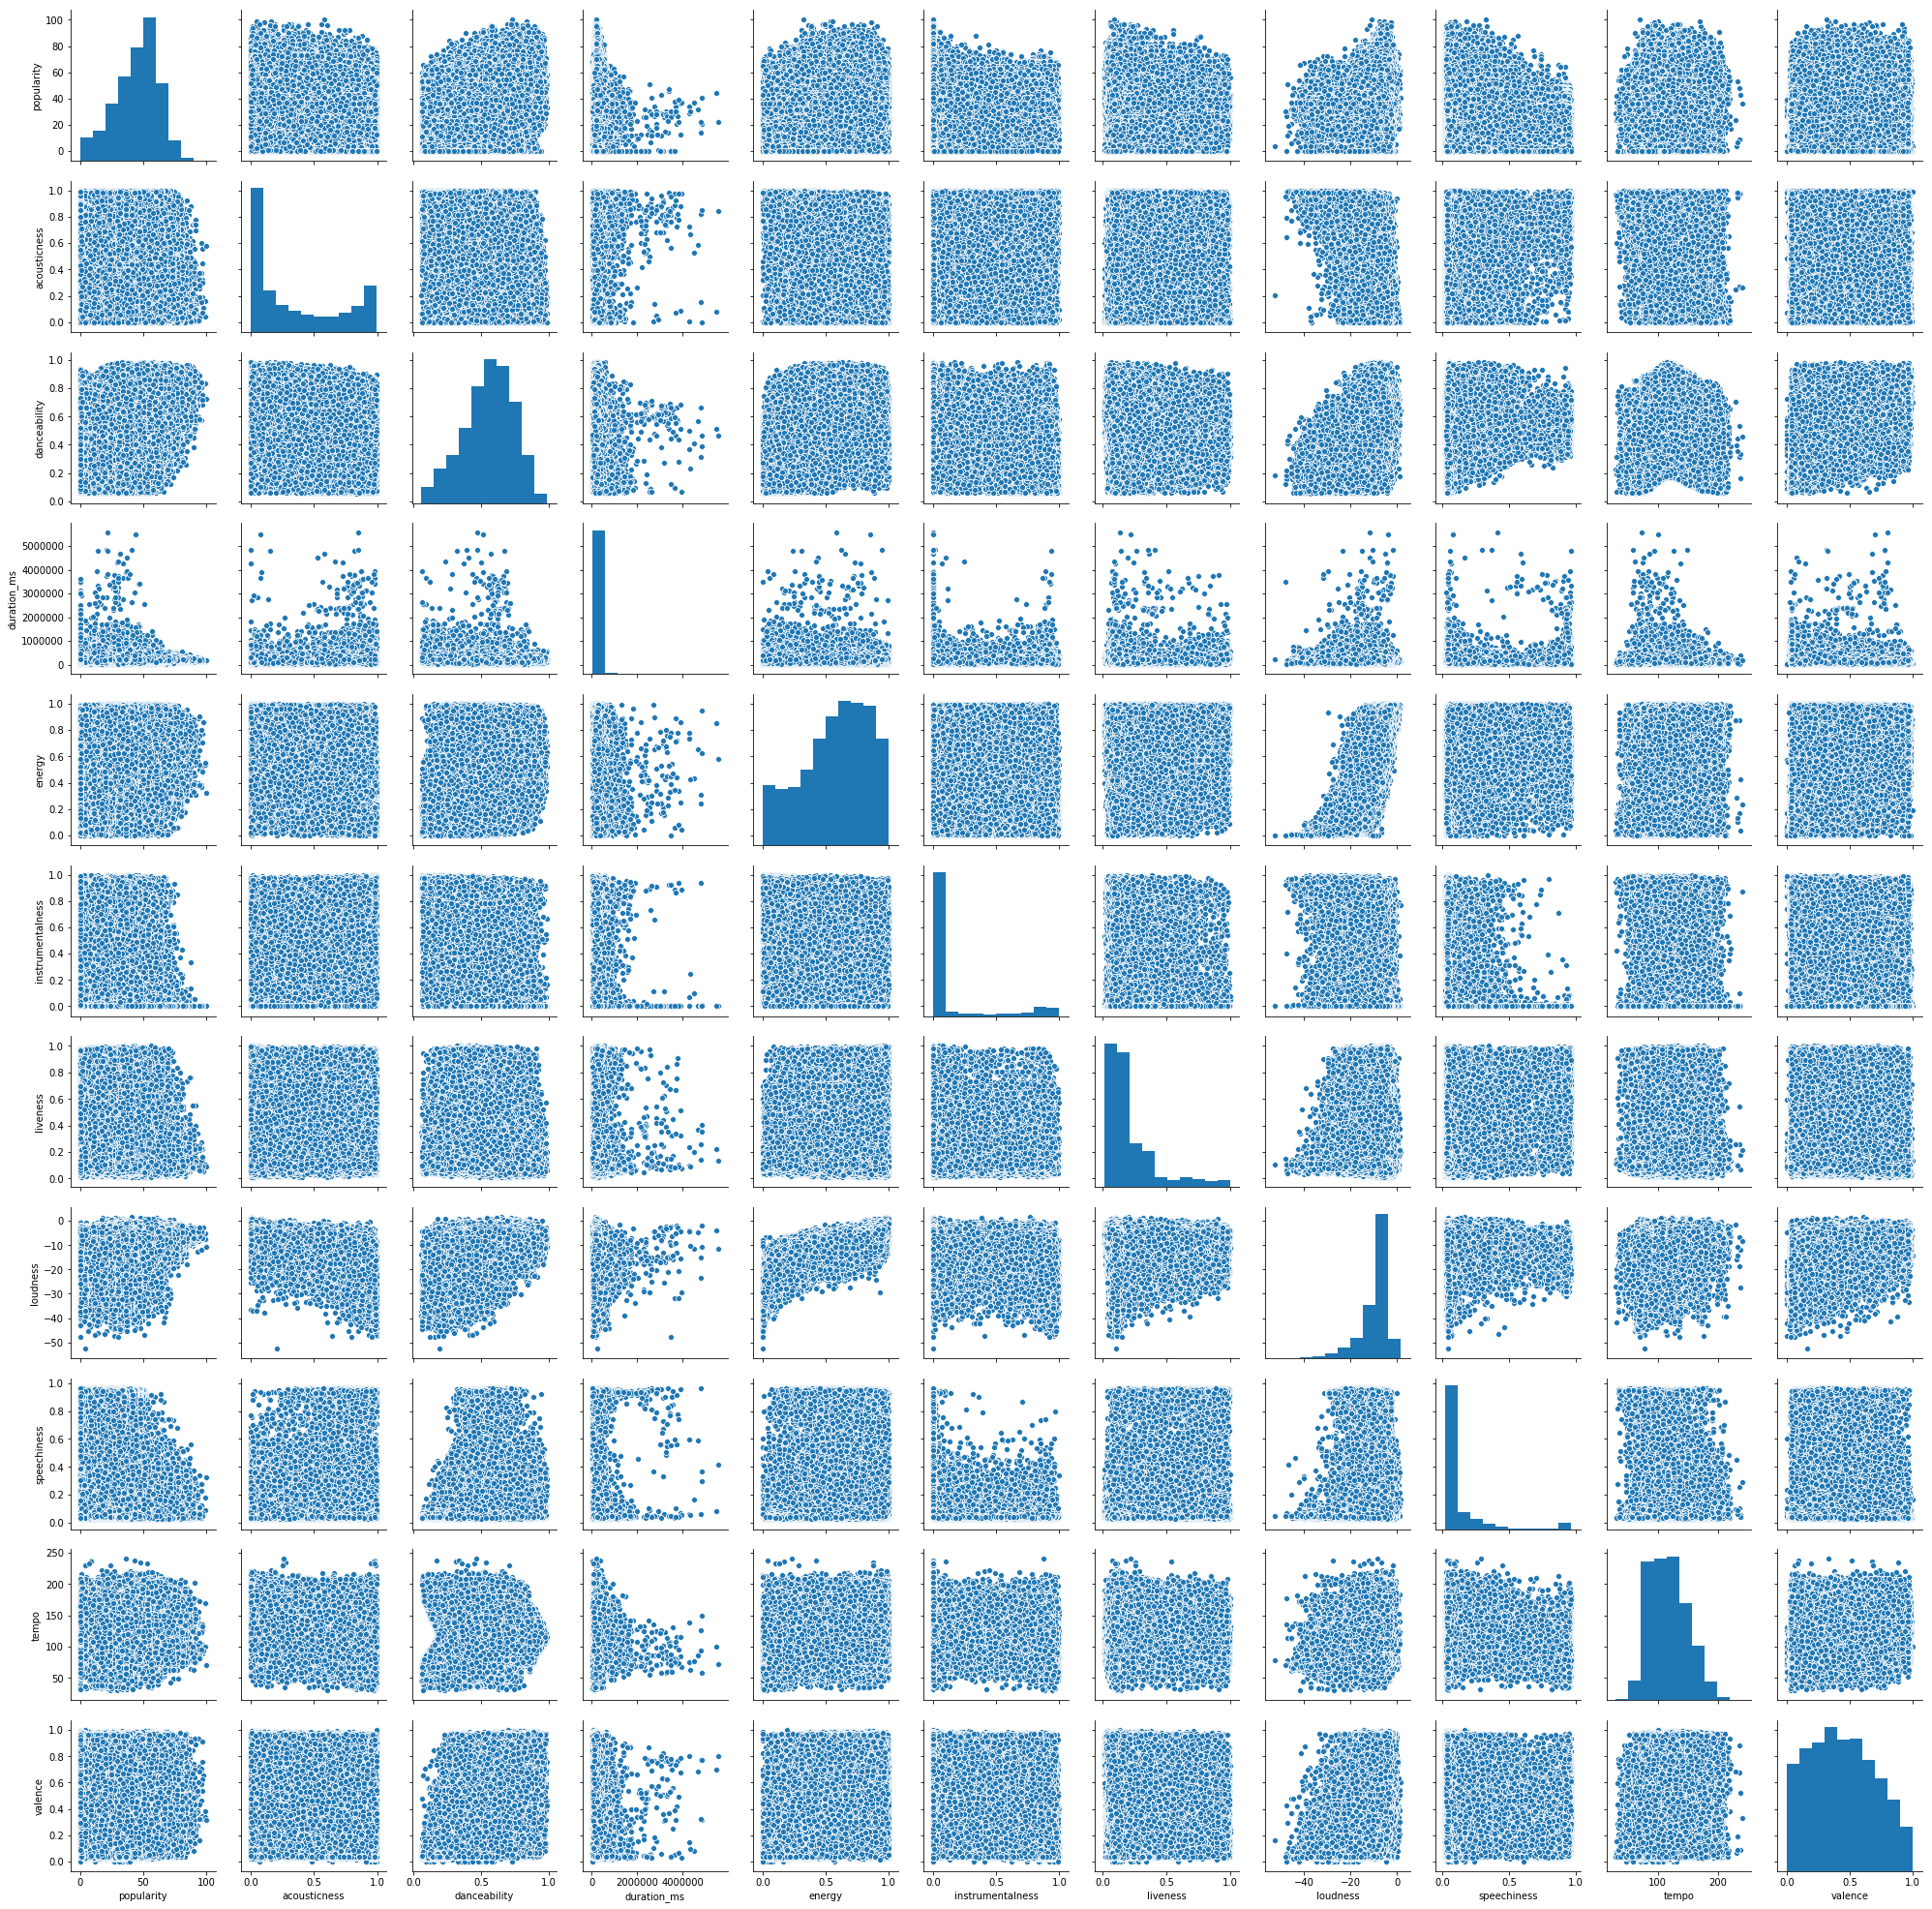

In [14]:
#sns.pairplot(music_features)

In [12]:
music_corr = music_features.corr()

Text(0.5,1,'Spotify Music Features')

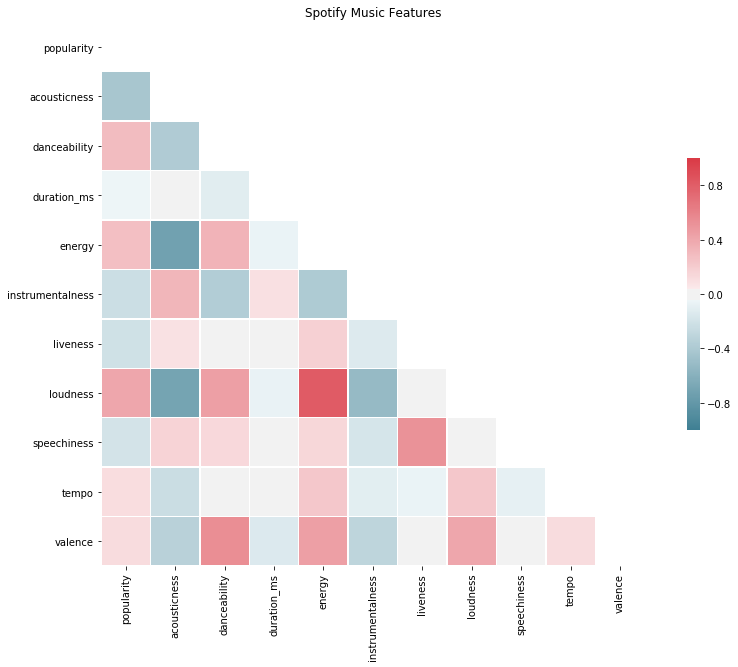

In [13]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(music_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(music_corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
         square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Spotify Music Features')

## Question 1) Predicting song Popularity with Acoustic Features 

### Support Vector Regressor
* Notes: Running SVR with 8 features, 228159 rows of data took too long, so we decided to narrow down to one genre 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_squared_error as rmse

In [10]:
popularity = df['popularity']
music_features = df.filter(items=['acousticness', 'danceability', 'duration_ms','energy','instrumentalness',
                   'liveness', 'loudness','speechiness','tempo','valence'])

genre_features = df.filter(items=['acousticness', 'danceability', 'duration_ms','energy','instrumentalness',
                   'liveness', 'loudness','speechiness','tempo','valence', 'genre'])

In [34]:
music_features.to_csv('features.csv')
popularity.to_csv('labels.csv')

In [ ]:
# This model runs more than 3 hours - 9:13 PM. 2019.06.05
# model = svm.SVR(kernel='linear', C=1).fit(X_train, y_train)

## Try for smaller set of dataframes - Pop or Alternative

### SVR with 4 Features,  Pop music only

In [11]:
%%time
pop_features = pop_df.filter(items=['acousticness', 'danceability','energy', 'loudness'])
pop_labels= pop_df['popularity']
pop_labels = np.array(pop_labels).flatten()


X = pop_features
target = pop_labels
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=0)
model = svm.SVR(kernel='linear', C=1).fit(X_train, y_train) # verbose=True
print('Score: ', model.score(X_test, y_test))
predicted = model.predict(X_test)
print('RMSE: ', rmse(predicted, y_test))

Score:  0.0016498159290754266
RMSE:  51.78891812529427
CPU times: user 857 ms, sys: 68.8 ms, total: 926 ms
Wall time: 925 ms


In [27]:
pop_df.shape

(9386, 18)

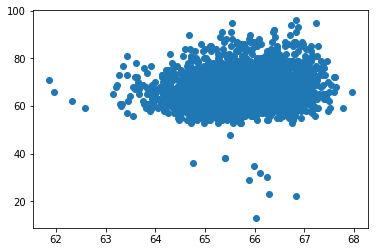

In [16]:
plt.scatter(predicted, y_test)

In [25]:
print('The popularity score ranges from', min(pop_slabels),'to', max(pop_slabels))

The popularity score ranges from 3 to 100


In [29]:
pd.DataFrame({'Pop_popularity':y_test}).describe()

Pop_popularity
count     3755.000000
mean        66.611451
std          7.241958
min         13.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         99.000000

In [33]:
test_results = X_test.copy()
test_results['pred_popularity'] = y_test

In [35]:
import seaborn as sns
sns.set()

In [36]:
test_results.columns

Index(['acousticness', 'danceability', 'energy', 'loudness',
       'pred_popularity'],
      dtype='object')

### Baseline LASSO Regressor

Try different alpha values

In [22]:
popularity = df['popularity']
music_features = df.filter(items=['acousticness', 'danceability', 'duration_ms','energy','instrumentalness',
                   'liveness', 'loudness','speechiness','tempo','valence'])

pop_features = pop_df.filter(items=['acousticness', 'danceability','energy', 'loudness'])
pop_labels= pop_df['popularity']
pop_labels = np.array(pop_labels).flatten()
X = pop_features
y = pop_labels
# holds out values
X_, X_hold, y_, y_hold = train_test_split(X, target, test_size=0.2, random_state=0)
for a in [.1, .5, .7, .9, .95, .99, 1]:
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=0)
    lasso_model = Lasso(alpha=a, fit_intercept=True, copy_X=True, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None,
              selection='cyclic')
    lasso_model.fit(X_train, y_train)
    predicted = lasso_model.predict(X_test)
    print('Results for alpha = ', a)
    print('R2 score: ',lasso_model.score(X_test, y_test))
    print('RMSE: ', rmse(predicted, y_test))

Results for alpha =  0.1
R2 score:  0.006743764969113775
RMSE:  49.434648910388844
Results for alpha =  0.5
R2 score:  -0.0009776968143411224
RMSE:  49.81894828740529
Results for alpha =  0.7
R2 score:  -0.0013559758156633792
RMSE:  49.83777534225882
Results for alpha =  0.9
R2 score:  -0.0013559758156633792
RMSE:  49.83777534225882
Results for alpha =  0.95
R2 score:  -0.0013559758156633792
RMSE:  49.83777534225882
Results for alpha =  0.99
R2 score:  -0.0013559758156633792
RMSE:  49.83777534225882
Results for alpha =  1
R2 score:  -0.0013559758156633792
RMSE:  49.83777534225882


In [18]:
## Baseline Lasso Model with alpha = 1
%%time
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0, fit_intercept=True, copy_X=True, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None,
              selection='cyclic')
lasso_model.fit(X_train, y_train)
predicted = lasso_model.predict(X_test)
print(lasso_model.score(X_test, y_test))
print('RMSE: ', rmse(predicted, y_test))

-0.00011718077796452064
RMSE:  51.88058019863151
CPU times: user 4.89 ms, sys: 2.09 ms, total: 6.98 ms
Wall time: 7.87 ms


## Genre Classifier: K-Nearest Neighbor Classifier for Question 2

In [24]:
# Translate genres to number labels 
gen = ['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie']
trans_dict = {gen[i]:i for i in range(len(gen))}
genre_features['number_label'] = genre_features['genre'].map(trans_dict)

In [25]:
X = genre_features.drop(['number_label','genre'], axis=1)
y = genre_features['number_label']
train_features, test_features,train_labels,test_labels = train_test_split(X, y, test_size = 0.3, stratify=df.genre)

In [27]:
%%time
scaler = MinMaxScaler()
knn_classifier = KNeighborsClassifier()
pipe = make_pipeline(scaler, knn_classifier)
k = [1, 3, 5, 7, 9, 15, 20]
param_grid = {'kneighborsclassifier__n_neighbors': np.array(k), 'kneighborsclassifier__weights':["uniform", "distance"]}

# Perform a  grid search of your pipeline
grid = GridSearchCV(pipe, param_grid, scoring="neg_mean_absolute_error")
grid.fit(train_features, train_labels)
print(grid.score(test_features, test_labels))
print(grid.best_params_)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversion

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all conve

-5.732702197288453
{'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'distance'}
CPU times: user 20min 35s, sys: 6.48 s, total: 20min 41s
Wall time: 19min 28s


In [29]:
print(grid.best_params_)
predicted = grid.predict(test_features)
print(grid.score(test_features, test_labels))

{'kneighborsclassifier__n_neighbors': 20, 'kneighborsclassifier__weights': 'distance'}
-5.715068373071529


In [30]:
print(predicted) # just to check if the model prints out the same thing over and over. 

[11 15  2 ...  2 18 18]


In [33]:
# Translate to number labels to genres
gen = ['Opera', 'A Capella', 'Alternative', 'Blues', 'Dance', 'Pop',
       'Electronic', 'R&B', 'Children’s Music', 'Folk', 'Anime', 'Rap',
       'Classical', 'Reggae', 'Hip-Hop', 'Comedy', 'Country', 'Reggaeton',
       'Ska', 'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World',
       'Movie']
inv_dict = {i:gen[i] for i in range(len(gen))}

In [38]:
gen_ = np.array(gen)

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(20,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [73]:
preds = predicted.tolist()
labels = test_labels.values.tolist()

Confusion matrix, without normalization
[[1668    0    3    0    0    0    0    0    0   37    0    1  472    1
     0    3    1    0    0    6    0    0  167   39   10   76]
 [  14    0    0    0    0    0    0    0    0    9    0    0    0    0
     0    0    4    0    0    0    0    1    0    1    2    5]
 [   0    0    3 2035   32   40    5   80  449   10  117    5    0    0
     5    0    1    0    2    5   12    0    0    0    5    0]
 [   0    0 2035    2   32   40    5   80  449   10  117    5    0    0
     5    0    1    0    2    5   12    0    0    0    6    0]
 [   0    0  194   89  173  645  122  395   30   64   21  118    0   65
    73    0  125  100   40  120  111   59    3   16   38    9]
 [   3    0  167   74  715   53   40  175   21  152   10  520    3   40
   167    0  136  101   23  132  152   47    3   17   38   27]
 [   6    0   75   65  133   44 1200   56   42   42   26   72    6   69
   107    0   43   79   55   55   48   60   90  305  129    6]
 [   4    0  36

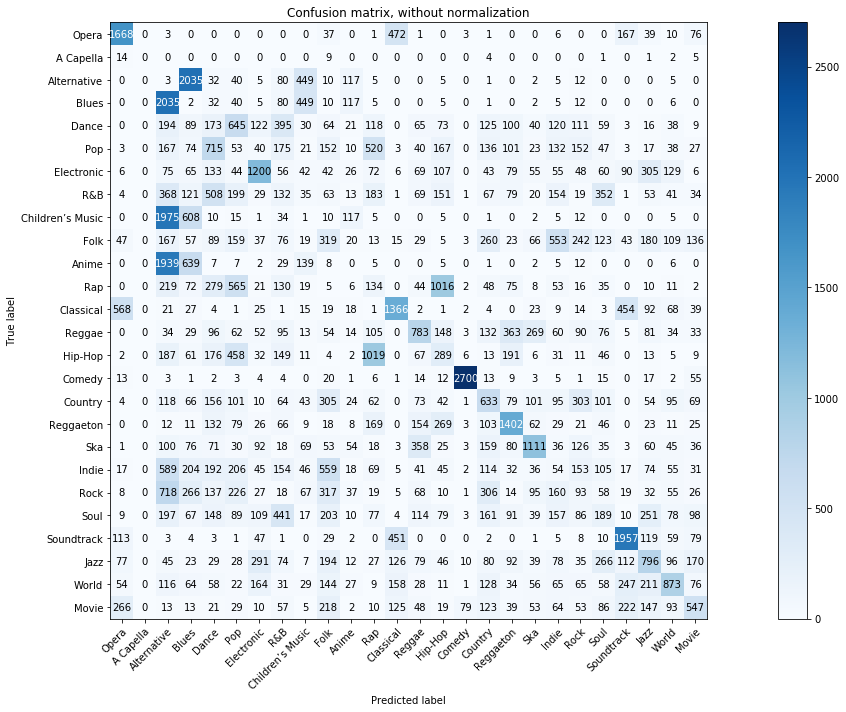

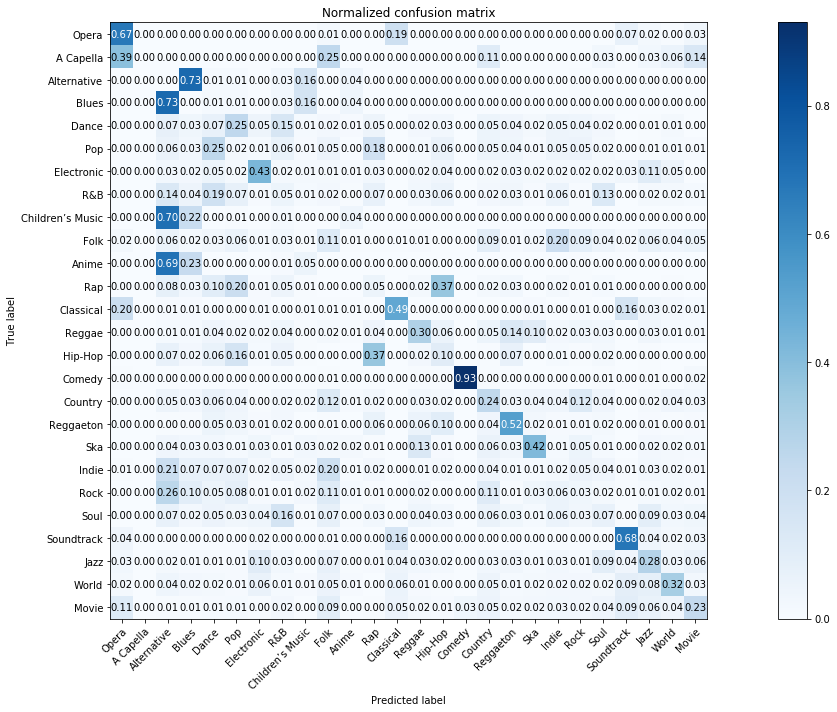

In [75]:
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(labels, preds, classes=np.array(gen),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(labels, preds, classes=np.array(gen), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [1]:
fig = plt.figure(figsize = (27, 10))
sns.boxplot(x="genre", y="speechiness", data=df)

NameError: name 'plt' is not defined